In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv('data/flight_delay/train.csv')
df_test = pd.read_csv('data/flight_delay/test.csv')

In [3]:
df_train.tail()

,id,dep_stn,arr_stn,ac_code,dep_date,arr_date,weather,hobbs_meter,year_man,dep_country,arr_country,delay
4995,TU 0375,ALG,TUN,TU 32AIMG,2017-11-07 15:15:00,2017-11-07 16.25.00,rainy,5467,2004-08,Algeria,Tunisia,10.0
4996,TU 0216,TUN,IST,TU 320IMV,2017-11-07 16:00:00,2017-11-07 18.35.00,cloudy,4301,2004-08,Tunisia,Turkey,15.0
4997,TU 0701,ZRH,TUN,TU 32AIMH,2017-11-07 18:30:00,2017-11-07 20.40.00,windy,7437,2011-03,Switzerland,Tunisia,25.0
4998,TU 0712,CMN,TUN,TU 320IMV,2017-11-08 10:30:00,2017-11-08 12.55.00,stormy,4301,2004-08,Morocco,Tunisia,16.0
4999,TU 0757,MXP,TUN,TU 32AIMN,2017-11-08 11:15:00,2017-11-08 13.10.00,sunny,7003,2007-05,Italy,Tunisia,16.0


In [4]:
## Exploratory Data Analysis

### Data Cleaning

#### Missing Values

df_train.isnull().sum()


id             0
dep_stn        0
arr_stn        0
ac_code        0
dep_date       0
arr_date       0
weather        0
hobbs_meter    0
year_man       0
dep_country    0
arr_country    0
delay          0
dtype: int64

In [5]:

df_test.isnull().sum()

id             0
dep_stn        0
arr_stn        0
ac_code        0
dep_date       0
arr_date       0
weather        0
hobbs_meter    0
year_man       0
dep_country    0
arr_country    0
dtype: int64

In [6]:
## Feature Engineering 

df_train['dep Date'] = pd.to_datetime(df_train['dep_date'], format='%Y-%m-%d ')
df_test['dep Date'] = pd.to_datetime(df_test['dep_date'], format='%Y-%m-%d')

df_train['depYear'] = df_train['dep Date'].dt.year
df_train['depMonth'] = df_train['dep Date'].dt.month
df_train['depDay'] = df_train['dep Date'].dt.day

df_test['depYear'] = df_test['dep Date'].dt.year
df_test['depMonth'] = df_test['dep Date'].dt.month
df_test['depDay'] = df_test['dep Date'].dt.day

In [7]:
## getting time from dep_date with format 2017-11-07 15:15:00 

df_train['depTime'] = df_train['dep_date'].str.split(' ').str[1]
df_test['depTime'] = df_test['dep_date'].str.split(' ').str[1]

df_train['depHour'] = df_train['depTime'].str.split(':').str[0].astype(int)
df_test['depHour'] = df_test['depTime'].str.split(':').str[0].astype(int)

df_train['depMinute'] = df_train['depTime'].str.split(':').str[1].astype(int)
df_test['depMinute'] = df_test['depTime'].str.split(':').str[1].astype(int)

df_train['depSecond'] = df_train['depTime'].str.split(':').str[2].astype(int)
df_test['depSecond'] = df_test['depTime'].str.split(':').str[2].astype(int)


In [8]:
## getting time from arr_date with format 2017-11-07 15.15.00

df_train['arrTime'] = df_train['arr_date'].str.split(' ').str[1]
df_test['arrTime'] = df_test['arr_date'].str.split(' ').str[1]

df_train['arrHour'] = df_train['arrTime'].str.split('.').str[0].astype(int)
df_test['arrHour'] = df_test['arrTime'].str.split('.').str[0].astype(int)

df_train['arrMinute'] = df_train['arrTime'].str.split('.').str[1].astype(int)
df_test['arrMinute'] = df_test['arrTime'].str.split('.').str[1].astype(int)

df_train['arrSecond'] = df_train['arrTime'].str.split('.').str[2].astype(int)
df_test['arrSecond'] = df_test['arrTime'].str.split('.').str[2].astype(int)

In [9]:
df_train['arr Date'] = pd.to_datetime(df_train['arr_date'], format='%Y-%m-%d %H.%M.%S')
df_test['arr Date'] = pd.to_datetime(df_test['arr_date'], format='%Y-%m-%d %H.%M.%S')

df_train['arrYear'] = df_train['arr Date'].dt.year
df_train['arrMonth'] = df_train['arr Date'].dt.month
df_train['arrDay'] = df_train['arr Date'].dt.day

df_test['arrYear'] = df_test['arr Date'].dt.year
df_test['arrMonth'] = df_test['arr Date'].dt.month
df_test['arrDay'] = df_test['arr Date'].dt.day

In [10]:
df_train.drop(['dep_date', 'dep Date', 'arr_date', 'arr Date'], axis=1, inplace=True)
df_test.drop(['dep_date', 'dep Date', 'arr_date', 'arr Date'], axis=1, inplace=True)

In [11]:
df_train.head()

,id,dep_stn,arr_stn,ac_code,weather,hobbs_meter,year_man,dep_country,arr_country,delay,...,depHour,depMinute,depSecond,arrTime,arrHour,arrMinute,arrSecond,arrYear,arrMonth,arrDay
0,TU 0930,TUN,MRS,TU 32AIMD,sunny,4390,2004-08,Tunisia,France,18.0,...,7,55,0,09.30.00,9,30,0,2016,1,1
1,TU 0526,TUN,DUS,TU 736IOQ,rainy,5882,2010-01,Tunisia,Germany,39.0,...,8,20,0,11.05.00,11,5,0,2016,1,1
2,TU 0718,TUN,ORY,TU 320IMU,foggy,6117,2011-03,Tunisia,France,14.0,...,10,5,0,12.25.00,12,25,0,2016,1,1
3,TU 0997,NCE,TUN,TU 320IMT,sunny,8941,2010-01,France,Tunisia,25.0,...,10,15,0,11.50.00,11,50,0,2016,1,1
4,TU 0700,TUN,GVA,TU 320IMV,stormy,4301,2004-08,Tunisia,Switzerland,21.0,...,12,40,0,14.35.00,14,35,0,2016,1,1


In [12]:
df_train.drop(['depTime', 'arrTime'], axis=1, inplace=True)

In [13]:
df_test.drop(['depTime', 'arrTime'], axis=1, inplace=True)

In [14]:
df_train.drop(['ac_code', 'id'], axis=1, inplace=True)

In [15]:
df_test.drop(['ac_code'], axis=1, inplace=True)

In [16]:
df_train.head()

,dep_stn,arr_stn,weather,hobbs_meter,year_man,dep_country,arr_country,delay,depYear,depMonth,depDay,depHour,depMinute,depSecond,arrHour,arrMinute,arrSecond,arrYear,arrMonth,arrDay
0,TUN,MRS,sunny,4390,2004-08,Tunisia,France,18.0,2016,1,1,7,55,0,9,30,0,2016,1,1
1,TUN,DUS,rainy,5882,2010-01,Tunisia,Germany,39.0,2016,1,1,8,20,0,11,5,0,2016,1,1
2,TUN,ORY,foggy,6117,2011-03,Tunisia,France,14.0,2016,1,1,10,5,0,12,25,0,2016,1,1
3,NCE,TUN,sunny,8941,2010-01,France,Tunisia,25.0,2016,1,1,10,15,0,11,50,0,2016,1,1
4,TUN,GVA,stormy,4301,2004-08,Tunisia,Switzerland,21.0,2016,1,1,12,40,0,14,35,0,2016,1,1


Text(0.5, 1.0, 'Correlation between features')

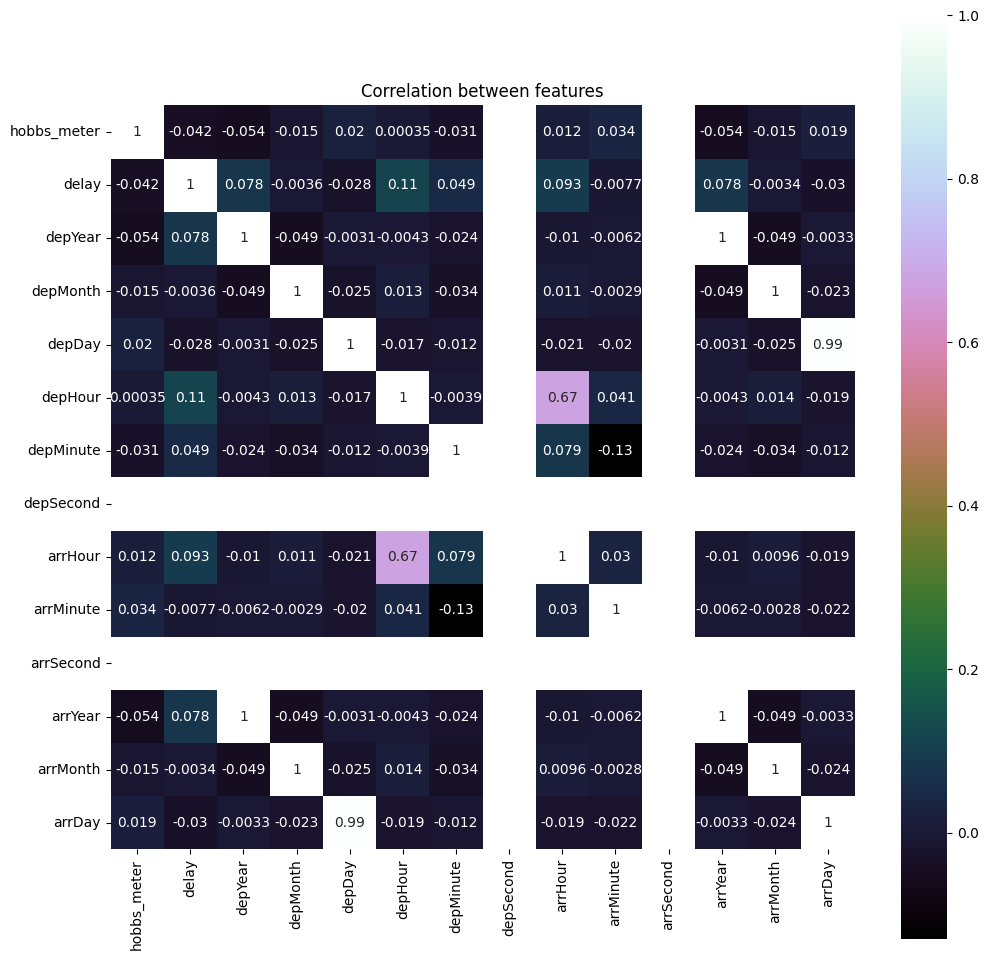

In [17]:
## Feature Selection

### Correlation Matrix

corr = df_train.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True, annot=True, cmap='cubehelix')
plt.title('Correlation between features')


In [18]:
## Data Preprocessing to convert dep_stn, arr_stn to numerical values using LabelEncoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_train['dep_stn'] = le.fit_transform(df_train['dep_stn'])
df_train['arr_stn'] = le.fit_transform(df_train['arr_stn'])
df_train['dep_country'] = le.fit_transform(df_train['dep_country'])
df_train['arr_country'] = le.fit_transform(df_train['arr_country'])
df_train['weather'] = le.fit_transform(df_train['weather'])

df_test['dep_stn'] = le.fit_transform(df_test['dep_stn'])
df_test['arr_stn'] = le.fit_transform(df_test['arr_stn'])
df_test['dep_country'] = le.fit_transform(df_test['dep_country'])
df_test['arr_country'] = le.fit_transform(df_test['arr_country'])
df_test['weather'] = le.fit_transform(df_test['weather'])

In [19]:
df_train.head()

,dep_stn,arr_stn,weather,hobbs_meter,year_man,dep_country,arr_country,delay,depYear,depMonth,depDay,depHour,depMinute,depSecond,arrHour,arrMinute,arrSecond,arrYear,arrMonth,arrDay
0,65,40,4,4390,2004-08,32,8,18.0,2016,1,1,7,55,0,9,30,0,2016,1,1
1,65,22,2,5882,2010-01,32,9,39.0,2016,1,1,8,20,0,11,5,0,2016,1,1
2,65,50,1,6117,2011-03,32,8,14.0,2016,1,1,10,5,0,12,25,0,2016,1,1
3,45,63,4,8941,2010-01,8,30,25.0,2016,1,1,10,15,0,11,50,0,2016,1,1
4,65,26,3,4301,2004-08,32,29,21.0,2016,1,1,12,40,0,14,35,0,2016,1,1


In [20]:
df_train['year_man'][1]

'2010-01'

In [21]:
a = '2004-01'
#split a in 2004 and 01

a.split('-')

print(a.split('-')[0])

print(a.split('-')[1])

2004
01


In [22]:
a = []
b = []
for i in df_train['year_man']:
    a.append(i.split('-')[0])
    b.append(i.split('-')[1])

In [23]:
## adding list a and b to df_train

df_train['year_of_man'] = a
df_train['monthof_man'] = b

In [24]:
a = []
b = []
for i in df_test['year_man']:
    a.append(i.split('-')[0])
    b.append(i.split('-')[1])

In [25]:

df_test['year_of_man'] = a
df_test['monthof_man'] = b

In [26]:
df_test.drop(['year_man'], axis=1, inplace=True)
df_train.drop(['year_man'], axis=1, inplace=True)

In [27]:
df_train.head()

,dep_stn,arr_stn,weather,hobbs_meter,dep_country,arr_country,delay,depYear,depMonth,depDay,...,depMinute,depSecond,arrHour,arrMinute,arrSecond,arrYear,arrMonth,arrDay,year_of_man,monthof_man
0,65,40,4,4390,32,8,18.0,2016,1,1,...,55,0,9,30,0,2016,1,1,2004,08
1,65,22,2,5882,32,9,39.0,2016,1,1,...,20,0,11,5,0,2016,1,1,2010,01
2,65,50,1,6117,32,8,14.0,2016,1,1,...,5,0,12,25,0,2016,1,1,2011,03
3,45,63,4,8941,8,30,25.0,2016,1,1,...,15,0,11,50,0,2016,1,1,2010,01
4,65,26,3,4301,32,29,21.0,2016,1,1,...,40,0,14,35,0,2016,1,1,2004,08


In [28]:
df_test.head()

,id,dep_stn,arr_stn,weather,hobbs_meter,dep_country,arr_country,depYear,depMonth,depDay,...,depMinute,depSecond,arrHour,arrMinute,arrSecond,arrYear,arrMonth,arrDay,year_of_man,monthof_man
0,TU 0216,59,28,3,4301,31,33,2017,11,8,...,0,0,18,35,0,2017,11,8,2004,08
1,TU 0543,41,62,3,6117,8,32,2017,11,8,...,5,0,18,10,0,2017,11,8,2011,03
2,TU 0527,21,62,1,7437,8,32,2017,11,8,...,20,0,18,55,0,2017,11,8,2011,03
3,UG 0011,19,62,1,8941,31,32,2017,11,8,...,0,0,19,50,0,2017,11,8,2010,01
4,TU 0214,59,28,1,8941,31,33,2017,11,9,...,20,0,8,55,0,2017,11,9,2010,01


In [29]:
## converting weather to one hot encoding

df_train = pd.get_dummies(df_train, columns=['weather'])
df_test = pd.get_dummies(df_test, columns=['weather'])

In [30]:
## standardizing the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

df_train['dep_stn'] = sc.fit_transform(df_train['dep_stn'].values.reshape(-1,1))
df_train['arr_stn'] = sc.fit_transform(df_train['arr_stn'].values.reshape(-1,1))
df_train['dep_country'] = sc.fit_transform(df_train['dep_country'].values.reshape(-1,1))
df_train['arr_country'] = sc.fit_transform(df_train['arr_country'].values.reshape(-1,1))
df_train['year_of_man'] = sc.fit_transform(df_train['year_of_man'].values.reshape(-1,1))
df_train['monthof_man'] = sc.fit_transform(df_train['monthof_man'].values.reshape(-1,1))
df_train['hobbs_meter'] = sc.fit_transform(df_train['hobbs_meter'].values.reshape(-1,1))
df_train['depYear'] = sc.fit_transform(df_train['depYear'].values.reshape(-1,1))
df_train['depMonth'] = sc.fit_transform(df_train['depMonth'].values.reshape(-1,1))
df_train['depDay'] = sc.fit_transform(df_train['depDay'].values.reshape(-1,1))
df_train['arrYear'] = sc.fit_transform(df_train['arrYear'].values.reshape(-1,1))
df_train['arrMonth'] = sc.fit_transform(df_train['arrMonth'].values.reshape(-1,1))
df_train['arrDay'] = sc.fit_transform(df_train['arrDay'].values.reshape(-1,1))
df_train['depHour'] = sc.fit_transform(df_train['depHour'].values.reshape(-1,1))
df_train['depMinute'] = sc.fit_transform(df_train['depMinute'].values.reshape(-1,1))
df_train['arrHour'] = sc.fit_transform(df_train['arrHour'].values.reshape(-1,1))
df_train['arrMinute'] = sc.fit_transform(df_train['arrMinute'].values.reshape(-1,1))

df_test['dep_stn'] = sc.fit_transform(df_test['dep_stn'].values.reshape(-1,1))
df_test['arr_stn'] = sc.fit_transform(df_test['arr_stn'].values.reshape(-1,1))
df_test['dep_country'] = sc.fit_transform(df_test['dep_country'].values.reshape(-1,1))
df_test['arr_country'] = sc.fit_transform(df_test['arr_country'].values.reshape(-1,1))
df_test['year_of_man'] = sc.fit_transform(df_test['year_of_man'].values.reshape(-1,1))
df_test['monthof_man'] = sc.fit_transform(df_test['monthof_man'].values.reshape(-1,1))
df_test['hobbs_meter'] = sc.fit_transform(df_test['hobbs_meter'].values.reshape(-1,1))
df_test['depYear'] = sc.fit_transform(df_test['depYear'].values.reshape(-1,1))
df_test['depMonth'] = sc.fit_transform(df_test['depMonth'].values.reshape(-1,1))
df_test['depDay'] = sc.fit_transform(df_test['depDay'].values.reshape(-1,1))
df_test['arrYear'] = sc.fit_transform(df_test['arrYear'].values.reshape(-1,1))
df_test['arrMonth'] = sc.fit_transform(df_test['arrMonth'].values.reshape(-1,1))
df_test['arrDay'] = sc.fit_transform(df_test['arrDay'].values.reshape(-1,1))
df_test['depHour'] = sc.fit_transform(df_test['depHour'].values.reshape(-1,1))
df_test['depMinute'] = sc.fit_transform(df_test['depMinute'].values.reshape(-1,1))
df_test['arrHour'] = sc.fit_transform(df_test['arrHour'].values.reshape(-1,1))
df_test['arrMinute'] = sc.fit_transform(df_test['arrMinute'].values.reshape(-1,1))

df_train.head()

,dep_stn,arr_stn,hobbs_meter,dep_country,arr_country,delay,depYear,depMonth,depDay,depHour,...,arrMonth,arrDay,year_of_man,monthof_man,weather_0,weather_1,weather_2,weather_3,weather_4,weather_5
0,0.893492,-0.245023,-1.061413,0.850806,-1.225061,18.0,-0.934538,-1.721211,-1.661703,-1.031295,...,-1.721854,-1.660382,-0.518096,1.141681,0,0,0,0,1,0
1,0.893492,-1.169017,-0.180051,0.850806,-1.131530,39.0,-0.934538,-1.721211,-1.661703,-0.814217,...,-1.721854,-1.660382,1.195373,-1.188144,0,0,1,0,0,0
2,0.893492,0.268307,-0.041231,0.850806,-1.225061,14.0,-0.934538,-1.721211,-1.661703,-0.380060,...,-1.721854,-1.660382,1.480951,-0.522480,0,1,0,0,0,0
3,-0.096933,0.935637,1.626977,-1.188437,0.832607,25.0,-0.934538,-1.721211,-1.661703,-0.380060,...,-1.721854,-1.660382,1.195373,-1.188144,0,0,0,0,1,0
4,0.893492,-0.963685,-1.113988,0.850806,0.739077,21.0,-0.934538,-1.721211,-1.661703,0.054096,...,-1.721854,-1.660382,-0.518096,1.141681,0,0,0,1,0,0


In [31]:
df_train['delay'] = sc.fit_transform(df_train['delay'].values.reshape(-1,1))

In [32]:
df_train.head()

,dep_stn,arr_stn,hobbs_meter,dep_country,arr_country,delay,depYear,depMonth,depDay,depHour,...,arrMonth,arrDay,year_of_man,monthof_man,weather_0,weather_1,weather_2,weather_3,weather_4,weather_5
0,0.893492,-0.245023,-1.061413,0.850806,-1.225061,-0.204570,-0.934538,-1.721211,-1.661703,-1.031295,...,-1.721854,-1.660382,-0.518096,1.141681,0,0,0,0,1,0
1,0.893492,-1.169017,-0.180051,0.850806,-1.131530,1.506561,-0.934538,-1.721211,-1.661703,-0.814217,...,-1.721854,-1.660382,1.195373,-1.188144,0,0,1,0,0,0
2,0.893492,0.268307,-0.041231,0.850806,-1.225061,-0.530500,-0.934538,-1.721211,-1.661703,-0.380060,...,-1.721854,-1.660382,1.480951,-0.522480,0,1,0,0,0,0
3,-0.096933,0.935637,1.626977,-1.188437,0.832607,0.365807,-0.934538,-1.721211,-1.661703,-0.380060,...,-1.721854,-1.660382,1.195373,-1.188144,0,0,0,0,1,0
4,0.893492,-0.963685,-1.113988,0.850806,0.739077,0.039878,-0.934538,-1.721211,-1.661703,0.054096,...,-1.721854,-1.660382,-0.518096,1.141681,0,0,0,1,0,0


[0.04676155 0.04683575 0.07053448 0.03601063 0.03350257 0.00768237
 0.05811869 0.07288271 0.06588094 0.05891083 0.         0.0541952
 0.06182169 0.         0.00735936 0.05831308 0.07172152 0.04841984
 0.0494813  0.02515942 0.02580616 0.02415189 0.02631933 0.0260506
 0.02408008]


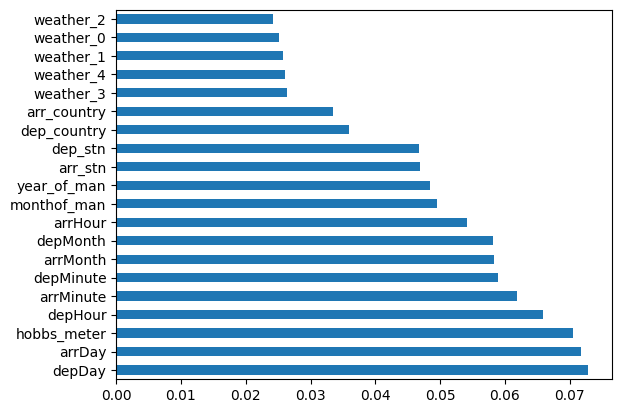

In [33]:

## Feature Importance

from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(df_train.drop('delay', axis=1), df_train['delay'])

print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=df_train.drop('delay', axis=1).columns)

feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [34]:

## splitting the data

X = df_train.drop('delay', axis=1)
y = df_train['delay']

In [35]:
## regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
X = df_train.drop(['delay'], axis=1)
y = df_train['delay']

reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [37]:

y_pred_reg = reg.predict(X)


In [38]:

## calculating the r2_score

print(r2_score(y, y_pred_reg))
## calculating the mean_squared_error

print(mean_squared_error(y, y_pred_reg))

## calculating the accuracy

print(reg.score(X, y))

0.029182022767594185
0.9708179772324056
0.029182022767594185


In [39]:
## calculate MAPE

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [40]:

mean_absolute_percentage_error(y, y_pred_reg)

116.48449524411397

,id,dep_stn,arr_stn,hobbs_meter,dep_country,arr_country,depYear,depMonth,depDay,depHour,...,arrMonth,arrDay,year_of_man,monthof_man,weather_0,weather_1,weather_2,weather_3,weather_4,weather_5
0,TU 0216,0.852531,-0.811077,-1.169246,0.810146,0.933127,-2.468238,1.059023,-0.912269,0.997045,...,1.058746,-0.911187,-0.587445,1.310014,0,0,0,1,0,0
1,TU 0543,-0.168985,0.930165,-0.058187,-1.170581,0.848594,-2.468238,1.059023,-0.912269,0.997045,...,1.058746,-0.911187,1.448928,-0.447608,0,0,0,1,0,0
2,TU 0527,-1.304003,0.930165,0.749410,-1.170581,0.848594,-2.468238,1.059023,-0.912269,0.997045,...,1.058746,-0.911187,1.448928,-0.447608,0,1,0,0,0,0
3,UG 0011,-1.417504,0.930165,1.669582,0.810146,0.848594,-2.468238,1.059023,-0.912269,1.670270,...,1.058746,-0.911187,1.158018,-1.150656,0,1,0,0,0,0
4,TU 0214,0.852531,-0.811077,1.669582,0.810146,0.933127,-2.468238,1.059023,-0.797190,-1.247036,...,1.058746,-0.796119,1.158018,-1.150656,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,TU 0635,0.285022,-1.323207,-0.069200,-1.256700,0.848594,0.405147,1.328403,1.734546,-0.349403,...,1.328125,1.735382,-0.878356,-0.799132,0,0,0,0,0,1
2996,TU 0282,0.852531,0.827739,0.749410,0.810146,-1.180188,0.405147,1.328403,1.734546,0.323821,...,1.328125,1.735382,1.448928,-0.447608,0,1,0,0,0,0
2997,TU 6648,-1.417504,-1.118355,-0.201964,0.810146,-1.095655,0.405147,1.328403,1.734546,0.548229,...,1.328125,1.735382,1.158018,-1.150656,0,1,0,0,0,0
2998,TU 0283,0.739029,0.930165,0.749410,-1.256700,0.848594,0.405147,1.328403,1.734546,0.997045,...,1.328125,1.735382,1.448928,-0.447608,0,0,0,0,0,1


In [45]:
## for test data

y_pred_reg_test = reg.predict(df_test.drop(['id'], axis=1))
y_pred_reg_test

## creating the submission file
descaling = sc.inverse_transform(y_pred_reg_test.reshape(-1,1))

In [48]:
submission = pd.DataFrame({
        "id": df_test["id"],
        "delay": descaling.reshape(-1)
    })

submission.to_csv('submission_regression.csv', index=False)

In [49]:
## regression model using XGBoost

import xgboost as xgb

data_dmatrix = xgb.DMatrix(data=X,label=y)
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X,y)


[20:46:59] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', ...)

In [50]:

y_pred = xg_reg.predict(X)

In [51]:
y_pred

array([0.08491943, 0.08326239, 0.31594962, ..., 0.27165493, 0.16032088,
       0.14650637], dtype=float32)

In [52]:
## calculating the r2_score

print(r2_score(y, y_pred))
## calculating the mean_squared_error

print(mean_squared_error(y, y_pred))

## calculating the accuracy

print(xg_reg.score(X, y))

0.016828416602541307
0.9831715833974586
0.016828416602541307


In [53]:
mean_absolute_percentage_error(y, y_pred)

132.61011233077443

In [54]:
## for test data

y_pred_test = xg_reg.predict(df_test.drop(['id'], axis=1))
y_pred_test

## creating the submission file

descaling = sc.inverse_transform(y_pred_test.reshape(-1,1))

submission = pd.DataFrame({
        "id": df_test["id"],
        "delay": descaling.reshape(-1)
    })

submission.to_csv('submission_xgboost.csv', index=False)

In [55]:
## using deep learning with early stopping

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(X.keys())]),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1)
])

model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.RMSprop(0.001),
                metrics=['mean_absolute_error', 'mean_squared_error', 'mape'])

early_stop = EarlyStopping(monitor = 'mape', mode = 'min', verbose = 1, patience = 25)

model.fit(X, y, epochs=100, batch_size=64, validation_split = 0.2, callbacks=[early_stop])

Epoch 1/100


2022-12-23 20:47:40.972010: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


63/63 [==============================] - 0s 2ms/step - loss: 1.0828 - mean_absolute_error: 0.8585 - mean_squared_error: 1.0828 - mape: 140.2868 - val_loss: 1.0719 - val_mean_absolute_error: 0.8720 - val_mean_squared_error: 1.0719 - val_mape: 125.8521
Epoch 2/100
63/63 [==============================] - 0s 654us/step - loss: 0.9870 - mean_absolute_error: 0.8289 - mean_squared_error: 0.9870 - mape: 126.0788 - val_loss: 1.0723 - val_mean_absolute_error: 0.8727 - val_mean_squared_error: 1.0723 - val_mape: 126.8767
Epoch 3/100
63/63 [==============================] - 0s 638us/step - loss: 0.9741 - mean_absolute_error: 0.8237 - mean_squared_error: 0.9741 - mape: 123.5752 - val_loss: 1.0854 - val_mean_absolute_error: 0.8747 - val_mean_squared_error: 1.0854 - val_mape: 130.5801
Epoch 4/100
63/63 [==============================] - 0s 631us/step - loss: 0.9613 - mean_absolute_error: 0.8186 - mean_squared_error: 0.9613 - mape: 122.3808 - val_loss: 1.0895 - val_mean_absolute_error: 0.8689 - val_me

In [56]:

y_pred = model.predict(X)

y_pred


157/157 [==============================] - 0s 257us/step


array([[ 0.20641352],
       [ 0.16873479],
       [ 0.1889782 ],
       ...,
       [ 0.47391495],
       [ 0.5615477 ],
       [-0.21550535]], dtype=float32)

In [57]:

## calculating the r2_score

print(r2_score(y, y_pred))

0.13370065229745765


In [58]:

## calculating the mean_squared_error

print(mean_squared_error(y, y_pred))

0.8662993477025422


In [59]:
X_test.shape

(3000, 26)

In [60]:
## for test data

y_pred_test = model.predict(df_test.drop(['id'], axis=1))
y_pred_test

## creating the submission file

descaling = sc.inverse_transform(y_pred_test.reshape(-1,1))

submission = pd.DataFrame({
        "id": df_test["id"],
        "delay": descaling.reshape(-1)
    })

submission.to_csv('submission_deep_learning.csv', index=False)

94/94 [==============================] - 0s 230us/step
